# NLP Lab

Calculate and validate the customer sentiment (polarity) based on reviews of purchased womens clothing

In [1]:
# packages
import docx2txt
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data into a dataframe

In [2]:
# getting the file
clothingdf = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Filter the data frame to a relevant subset of columns 

In [3]:
# removing unnecesary columns
clothingdf.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Recommended IND', 
                 'Positive Feedback Count', 'Class Name' ], axis = 1, inplace = True)
clothingdf.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## Standardise column headers

In [4]:
# lowercase
clothingdf.columns = clothingdf.columns.str.lower()
# remove spaces
clothingdf.columns = clothingdf.columns.str.replace(' ','_')
clothingdf.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## EDA - (describe(), shape, info()) and/or simple charts

In [5]:
clothingdf.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
clothingdf.shape

(23486, 5)

In [7]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [8]:
# drop nulls
clothingdf.dropna(inplace = True)
# reset index
clothingdf.reset_index(drop = True, inplace = True)
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19662 non-null  object
 1   review_text      19662 non-null  object
 2   rating           19662 non-null  int64 
 3   division_name    19662 non-null  object
 4   department_name  19662 non-null  object
dtypes: int64(1), object(4)
memory usage: 768.2+ KB


## Summarise the average rating by division and department as a new dataframe

In [9]:
clothingdf_ratingdivdep = clothingdf.groupby(['division_name', 'department_name'])['rating'].mean()
clothingdf_ratingdivdep

division_name   department_name
General         Bottoms            4.263083
                Dresses            4.150079
                Jackets            4.239488
                Tops               4.138255
                Trend              3.875000
General Petite  Bottoms            4.336783
                Dresses            4.118314
                Intimate           4.223404
                Jackets            4.322289
                Tops               4.191582
                Trend              3.789474
Initmates       Intimate           4.263115
Name: rating, dtype: float64

## Visualise as a bar chart

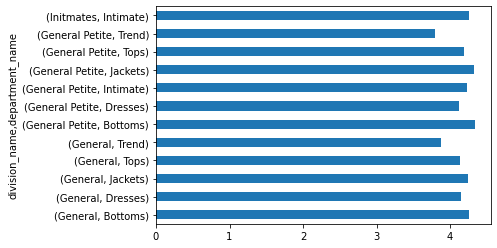

In [10]:
clothingdf_ratingdivdep.plot.barh()
plt.show();

## Spot /sample check on review column: index 5.  Apply textblob.  
  
Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [11]:
# getting the text
sample = TextBlob(clothingdf.at[5, 'review_text'])
print(sample)
print(sample.sentiment)

I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...
Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)


In [12]:
# other 3 samples
sample1 = TextBlob(clothingdf.at[42, 'review_text'])
print(sample1)
print(sample1.sentiment)

Nice top. armholes are a bit oversized but as an older woman, i'm picky about that. the print is pretty and unusual. it just didn't look great on me. there's a slight peplum in the back that hangs nicely. it's a lightweight tee fabric that's opaque. i tried it on with a black bra which was barely visible. great for warmer climates but there are so many gorgeous tops out now, that i decided to return since summer is winding down. i do recommend.
Sentiment(polarity=0.3118518518518519, subjectivity=0.5814814814814816)


In [13]:
sample2 = TextBlob(clothingdf.at[562, 'review_text'])
print(sample2)
print(sample2.sentiment)

I have been searching for a pale pink sweater for fall. the color and fit is much prettier than the way it is photographed here. i think it will look great over denim, grey, or olive green dresses and shirts.
Sentiment(polarity=0.12000000000000001, subjectivity=0.31857142857142856)


In [14]:
sample3 = TextBlob(clothingdf.at[1082, 'review_text'])
print(sample3)
print(sample3.sentiment)

This a lovely piece. you have to see it close up to appreciate the subtle details. i typically wear xxsp or xsp, so i did not expect this to fit, but decided to try it because i liked the style. as a petite, many poncho styles overwhelm me and look like tents. not this one. the xxs fit nicely - just the right length and width. i am 5'1" and 108 lbs. i think one of the reasons this has not been popular is because it only shows up when searching on ponchos, and not when you search for sweaters. it
Sentiment(polarity=0.3077922077922078, subjectivity=0.6623376623376623)


## Break out any of the sample texts into sentences

In [15]:
sample.sentences

[Sentence("I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants)."),
 Sentence("everything went with it."),
 Sentence("the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc."),
 Sentence("my only compaint is it is a bit big, sleeves are long and it doesn't go in petite."),
 Sentence("also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...")]

In [16]:
sample3.sentences

[Sentence("This a lovely piece."),
 Sentence("you have to see it close up to appreciate the subtle details."),
 Sentence("i typically wear xxsp or xsp, so i did not expect this to fit, but decided to try it because i liked the style."),
 Sentence("as a petite, many poncho styles overwhelm me and look like tents."),
 Sentence("not this one."),
 Sentence("the xxs fit nicely - just the right length and width."),
 Sentence("i am 5'1" and 108 lbs."),
 Sentence("i think one of the reasons this has not been popular is because it only shows up when searching on ponchos, and not when you search for sweaters."),
 Sentence("it")]

## Define a function with lambda to calculate sentiment polarity as a new column on the data frame

In [17]:
clothingdf['sentiment'] = clothingdf['review_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
clothingdf.head()

,title,review_text,rating,division_name,department_name,sentiment
0,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
2,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,0.178750
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,0.133750


## Summarise the minimum review polarity, by division and department

In [18]:
clothingdf_sentiment = clothingdf.groupby(['division_name', 'department_name'])['sentiment'].min().sort_values()
clothingdf_sentiment

division_name   department_name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Jackets           -0.562500
General         Bottoms           -0.533333
Initmates       Intimate          -0.392333
General Petite  Dresses           -0.350000
General         Trend             -0.266667
General Petite  Bottoms           -0.257778
                Intimate          -0.230000
                Trend             -0.083333
Name: sentiment, dtype: float64

## Visualise this summary as a simple sorted bar chart

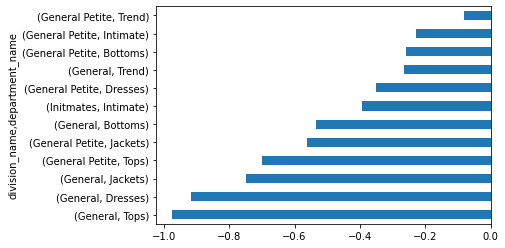

In [19]:
clothingdf_sentiment.plot.barh()
plt.show();

## Summarise the average review polarity, by division and department

In [20]:
clothingdf_sentimentmean = clothingdf.groupby(['division_name', 'department_name'])['sentiment'].mean().sort_values()
clothingdf_sentimentmean

division_name   department_name
General Petite  Trend              0.200323
General         Trend              0.217553
                Jackets            0.233525
General Petite  Intimate           0.236437
                Jackets            0.243738
                Dresses            0.244588
General         Tops               0.244662
                Bottoms            0.244726
                Dresses            0.245965
Initmates       Intimate           0.252428
General Petite  Tops               0.253046
                Bottoms            0.256405
Name: sentiment, dtype: float64

## Visualise it

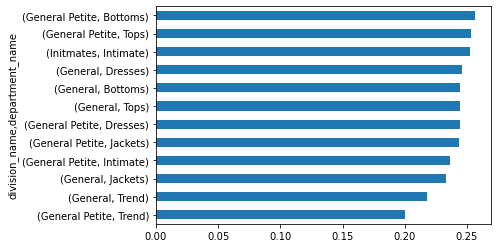

In [21]:
clothingdf_sentimentmean.plot.barh()
plt.show();